# Препроцессинг

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
import seaborn as sns

In [74]:
url = "./online_shoppers_intention.csv"
data_raw = pd.read_csv(url)

data = data_raw

categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
for column in categorical_columns:
  data[column] = data[column].astype('category')

In [75]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [76]:
data.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

In [77]:
visitor_type_dummies = pd.get_dummies(data['VisitorType'])
traffic_type_dummies = pd.get_dummies(data['TrafficType'], prefix='TrafficType')

region_dummies = pd.get_dummies(data['Region'], prefix='Region')
month_dummies = pd.get_dummies(data['Month'])

data_final = pd.concat((data, visitor_type_dummies, traffic_type_dummies, region_dummies, month_dummies), axis=1)
data_final = data_final.drop(['VisitorType', 'TrafficType', 'Region', 'Month', 'Weekend', 'OperatingSystems', 'Browser', 'ExitRates', 'ProductRelated_Duration'], axis=1)
data_final['Revenue'] = data_final['Revenue'].astype(int)

In [78]:
data_final.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
BounceRates                float64
PageValues                 float64
SpecialDay                 float64
Revenue                      int64
New_Visitor                  uint8
Other                        uint8
Returning_Visitor            uint8
TrafficType_1                uint8
TrafficType_2                uint8
TrafficType_3                uint8
TrafficType_4                uint8
TrafficType_5                uint8
TrafficType_6                uint8
TrafficType_7                uint8
TrafficType_8                uint8
TrafficType_9                uint8
TrafficType_10               uint8
TrafficType_11               uint8
TrafficType_12               uint8
TrafficType_13               uint8
TrafficType_14               uint8
TrafficType_15               uint8
TrafficType_16               uint8
TrafficType_17      

In [79]:
for column in ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay']:
    data_final[column] = (data_final[column] - data_final[column].mean())/data_final[column].std()

In [80]:
data_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Revenue,New_Visitor,Other,Returning_Visitor,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,3.667040,-0.317165,-0.308809,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.457664,-0.317165,-0.308809,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,3.667040,-0.317165,-0.308809,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,0.573512,-0.317165,-0.308809,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.696965,-0.457173,-0.396462,-0.244921,-0.488617,-0.045194,-0.317165,-0.308809,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Отбор признаков

In [81]:
from sklearn.model_selection import train_test_split

X = data_final.drop(['Revenue'], axis=1)
y = data_final['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, log_loss, f1_score, r2_score, accuracy_score

In [127]:
trees = [5, 10, 30, 50, 70, 100, 200]
train_accuracy = []
test_accuracy = []
r2_accuracy = []
oob_error = []
feature_importance = []
for n_tree in trees:
    model = RandomForestClassifier(n_estimators=n_tree, oob_score=True)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    pred_y = model.predict(X_test) 
    r2_accuracy.append(r2_score(y_test, pred_y))
    oob_error.append(model.oob_score_)
    feature_importance.append(model.feature_importances_)
    test_accuracy.append(accuracy_score(y_test, pred_y))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


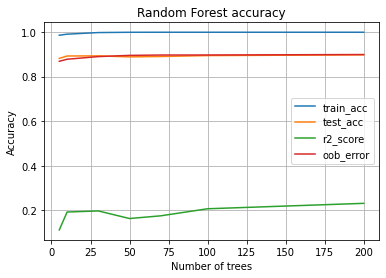

In [128]:
train_accuracy_line, = plt.plot(trees, train_accuracy, label="train_acc")
test_accuracy_line, = plt.plot(trees, test_accuracy, label="test_acc")
r2_accuracy_line, = plt.plot(trees, r2_accuracy, label="r2_score")
oob_error_line, = plt.plot(trees, oot_error, label="oob_error")
plt.title("Random Forest accuracy")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.grid()
plt.legend(handles=[
    train_accuracy_line,
    test_accuracy_line,
    r2_accuracy_line,
    oob_error_line,
])
plt.show()

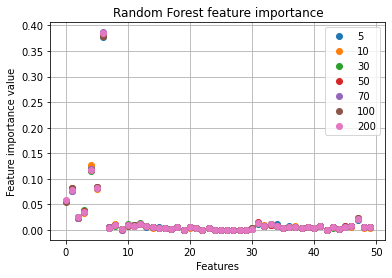

In [113]:
for i in range(len(trees)):
    plt.plot(range(X.shape[1]),feature_importance[i], 'o', label=trees[i])
plt.title("Random Forest feature importance")
plt.xlabel("Features")
plt.ylabel("Feature importance value")
plt.legend()
plt.grid()
plt.show()

In [114]:
np.max(test_accuracy)

0.8952319169639961

In [115]:
data_final.columns[:6]

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates'],
      dtype='object')

# Gradient Boosting

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [124]:
trees = [5, 10, 30, 50, 70, 100, 200]
train_accuracy = []
test_accuracy = []
r2_accuracy = []
oob_error = []
feature_importance = []
for n_tree in trees:
    model = GradientBoostingClassifier(n_estimators=n_tree, subsample=0.5)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    oob_im = np.cumsum(model.oob_improvement_)
    oob_error.append(oob_im[len(oob_im)-1]/X_train.shape[0])
    feature_importance.append(model.feature_importances_)
    pred_y = model.predict(X_test) 
    test_accuracy.append(accuracy_score(y_test, pred_y))
    r2_accuracy.append(r2_score(y_test, pred_y))

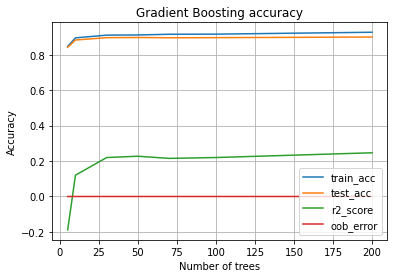

In [125]:
train_accuracy_line, = plt.plot(trees, train_accuracy, label="train_acc")
test_accuracy_line, = plt.plot(trees, test_accuracy, label="test_acc")
r2_accuracy_line, = plt.plot(trees, r2_accuracy, label="r2_score")
oob_error_line, = plt.plot(trees, oob_error, label="oob_error")
plt.title("Gradient Boosting accuracy")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.grid()
plt.legend(handles=[
    train_accuracy_line,
    test_accuracy_line,
    r2_accuracy_line,
    oob_error_line,
])
plt.show()

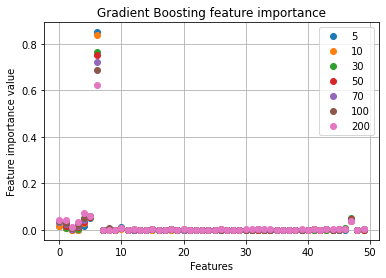

In [126]:
for i in range(len(trees)):
    plt.plot(range(X.shape[1]),feature_importance[i], 'o', label=trees[i])
plt.title("Gradient Boosting feature importance")
plt.xlabel("Features")
plt.ylabel("Feature importance value")
plt.legend()
plt.grid()
plt.show()

In [120]:
 np.max(test_accuracy)

0.8971780733052221

In [121]:
data_final.columns[:6]

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates'],
      dtype='object')

## Выводы

*   По сделанным экспериментам недообучения или переобучения не наблюдается.
*   Наиболее значимые признаки - первые шесть признаков ('Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates')
*   Обе модели показали почти одинковую точность на тестовой выборке ~ 0.89

## Общие выводы


В рамках выбполненных лаборатоных работ было сделано следующее:

*   Исследованы данные о сессиях проведенных различными пользователями на сайте некоторого онлайн-магазина
*   Проведена обработка датасета (нормализация, бинаризация категориальных признаков и т.д.)
*   Провизуализированы данные
*   Обучены слудющие классификаторы: KNN, SVM, Random Forest Classifier, Gradient Boosting Classifier
*   Сравнение обученных моделей
*   Выделены наиболее значимые признаки
*   Обучена нейронная сеть
*   Найдены оптимальные параметры для нейронной сети

В итоге не было замечено переобучения или недообучения ни на одной модели. Наибольшую точность на тестовой выборке показал Gradient Boosting Classifier - 0.897. Точность нейронной сети - 0.892.

